<a href="https://colab.research.google.com/github/MaisterLupo/AI-Data-Analysis/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# libraries for EDA and ML
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import random
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import statsmodels.api as sm
# libraries for DL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score

Exploratory Data Analysis

In [2]:
iris = sns.load_dataset('iris')
print(iris)

iris.info()
# la nostra variabile target è species (di tipo str) mentre le nostre features sono 4 (di tipo float) e riguardano le caratteristiche del fiore

iris.nunique()
# non ci sono valori nulli e valori mancanti

iris_copy = iris
iris_target = iris['species']
# variabile target

iris.shape
# 150 righe e 5 colonne

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
-

(150, 5)

Univariate Analysis

<Figure size 1000x500 with 0 Axes>

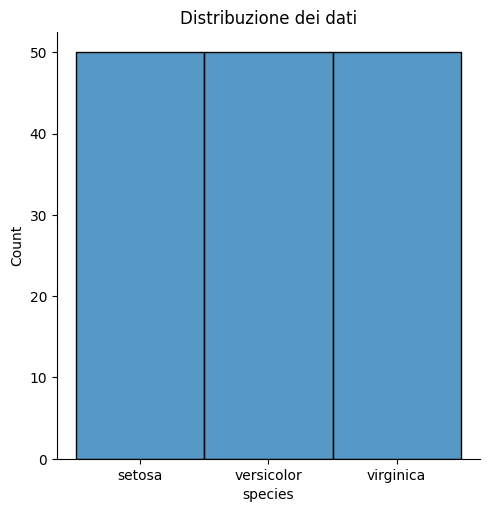

In [3]:
plt.figure(figsize=(10,5))
sns.displot(iris['species'])
plt.title('Distribuzione dei dati')
plt.show()
# i dati sono equamente distribuiti in 50 occorrenze per ognuna delle 3 classi

Bivariate Analysis Sepal Length e Specie

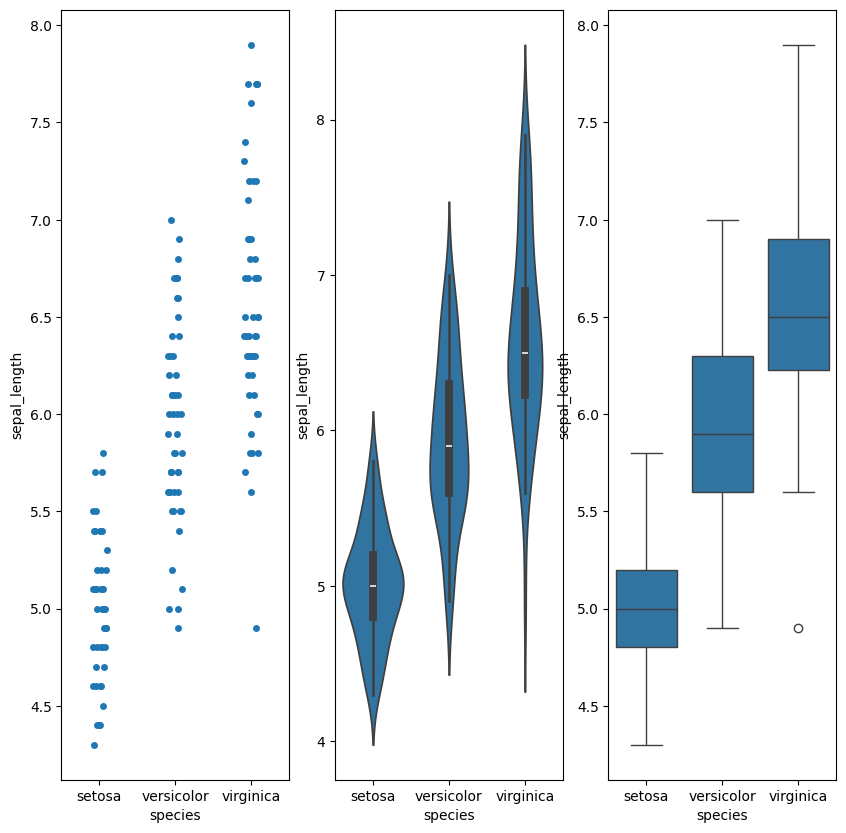

In [4]:
figs, ar = plt.subplots(1,3, figsize = (10,10))
sns.stripplot(data=iris, x='species', y='sepal_length', ax = ar[0])
sns.violinplot(data=iris, x='species', y='sepal_length', ax = ar[1])
sns.boxplot(data=iris, x='species', y='sepal_length', ax = ar[2])
plt.show()
# analisi bivariata per la variabile sepal length e la specie
# possiamo osservare una relazione di tipo lineare noonostante il fatto che la specie setosa sembra più definita rispetto alle specie versicolor e virginica

Bivariate Analysis Sepal Width e Specie

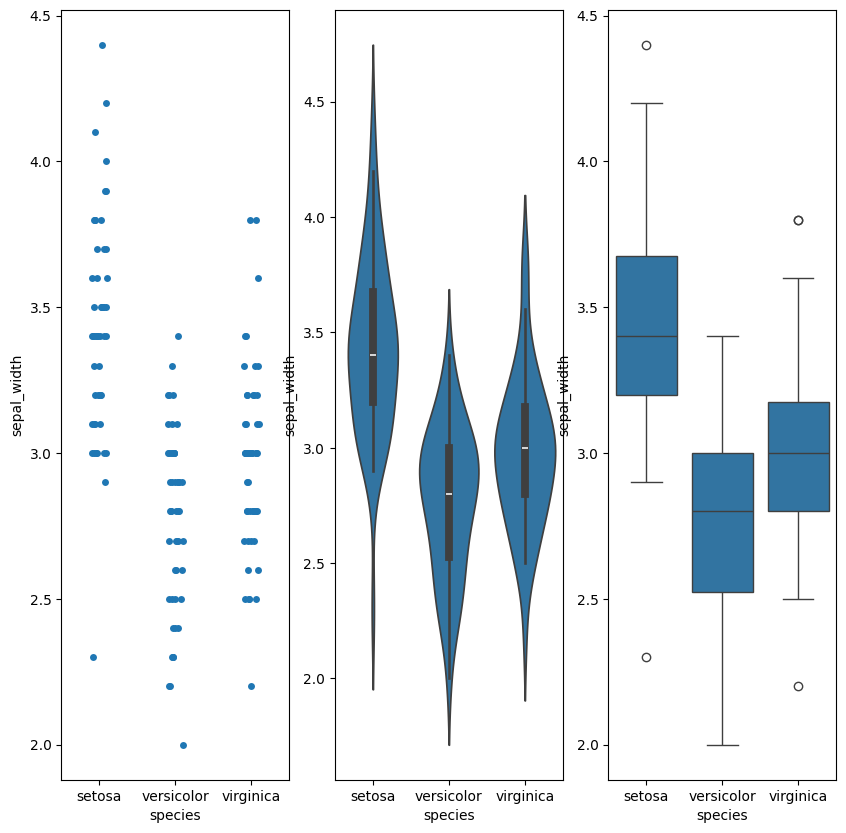

In [5]:
figs, ar = plt.subplots(1,3, figsize = (10,10))
sns.stripplot(data=iris, x='species', y='sepal_width', ax = ar[0])
sns.violinplot(data=iris, x='species', y='sepal_width', ax = ar[1])
sns.boxplot(data=iris, x='species', y='sepal_width', ax = ar[2])
plt.show()
# analisi bivariata per la variabile sepal length e la specie
# possiamo osservare una sovrapposizione tra le caratteristiche della specie versicolor e virginica mentre la specie setosa è ben definita

Bivariate Analysis Petal Length e Specie

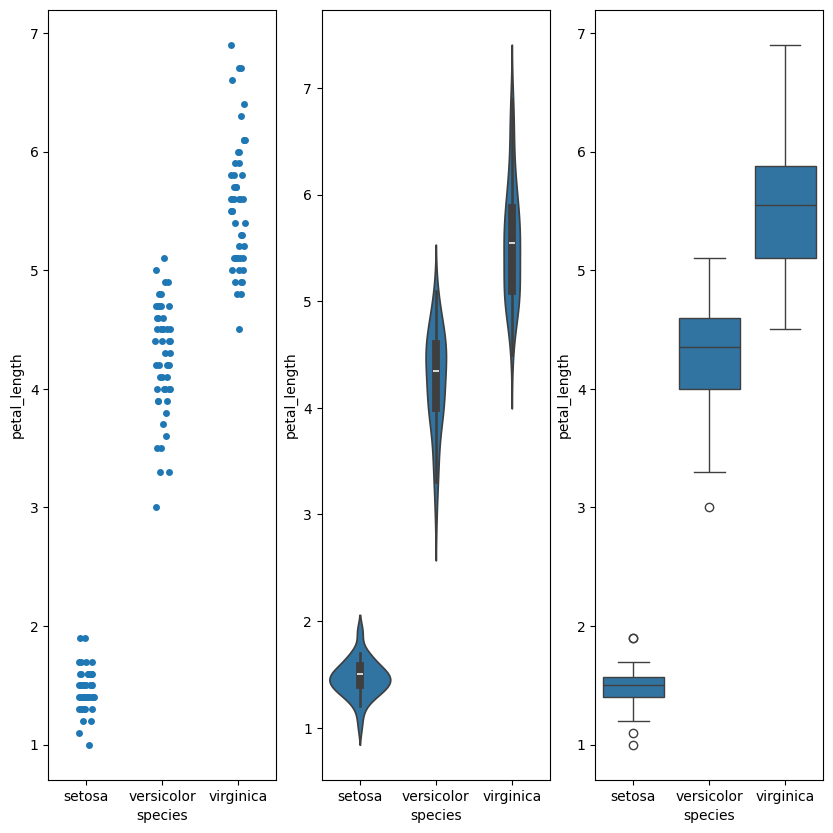

In [6]:
figs, ar = plt.subplots(1,3, figsize = (10,10))
sns.stripplot(data=iris, x='species', y='petal_length', ax = ar[0])
sns.violinplot(data=iris, x='species', y='petal_length', ax = ar[1])
sns.boxplot(data=iris, x='species', y='petal_length', ax = ar[2])
plt.show()
# analisi bivariata per la variabile sepal length e la specie
# possiamo osservare una definizione delle tre specie più consistente rispetto alle variabili considerate fin ora

Bivariate Analysis Petal Width e Specie

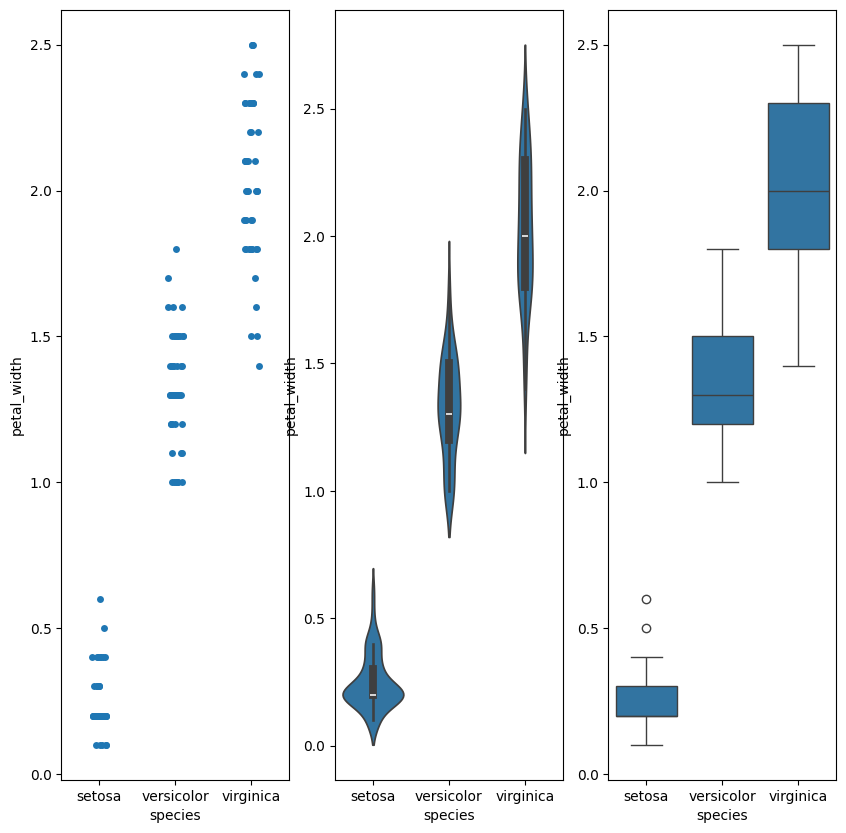

In [7]:
figs, ar = plt.subplots(1,3, figsize = (10,10))
sns.stripplot(data=iris, x='species', y='petal_width', ax = ar[0])
sns.violinplot(data=iris, x='species', y='petal_width', ax = ar[1])
sns.boxplot(data=iris, x='species', y='petal_width', ax = ar[2])
plt.show()
# analisi bivariata per la variabile sepal length e la specie
# possiamo osservare una definizione delle tre specie più consistente rispetto alle variabili considerate fin ora

Dalla nostra analisi explorativa concludiamo che:
- il dataset comprende 150 righe e 5 colonne
- il dataset non presenta valori nulli o mancanti
- il dataset ha 4 variabili continui e una variabile asimmetrica categoriale
- la variabile specie è la target di cui al suo interno abbiamo 3 classi
- le tre specie sono equamente distribuite
- le variabili petal_length e petal_width rappresentano maggiormente una distinzione quasi chiara delle tre classi
- le variabili sepal_length e sepal_width rappresentano delle difficoltà a classificare correttamente le classi

Descriptive statistical analysis

In [8]:
print(iris.describe().T)

              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5


In [9]:
le = preprocessing.LabelEncoder()

le.fit(iris['species'])
iris['species'] = le.fit_transform(iris['species'])
print(iris['species'])

# 0 = setosa --- 1 = versicolor --- 2 = virginica

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


Multivariate analysis

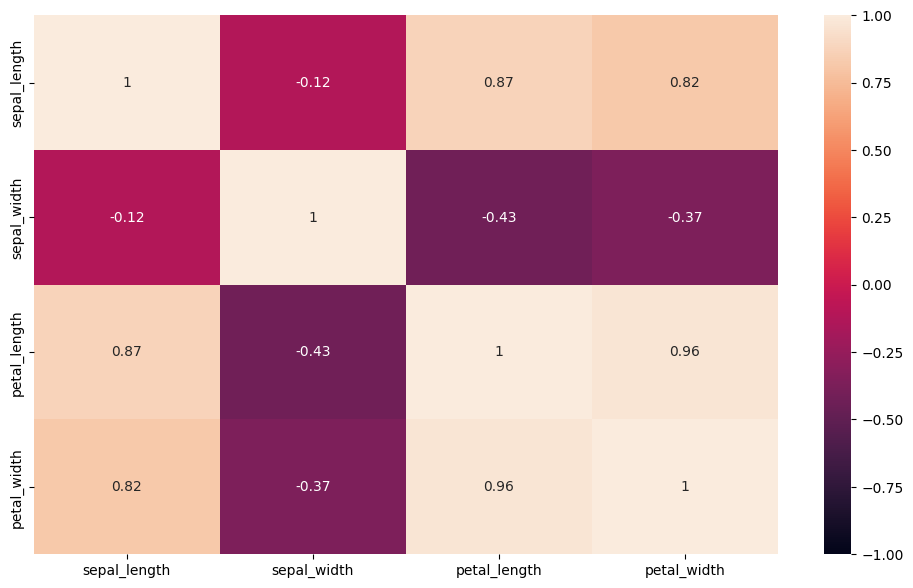

In [10]:
iris = iris.drop(['species'], axis=1)
plt.figure(figsize=(12, 7))
sns.heatmap(iris.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

<Figure size 1300x1700 with 0 Axes>

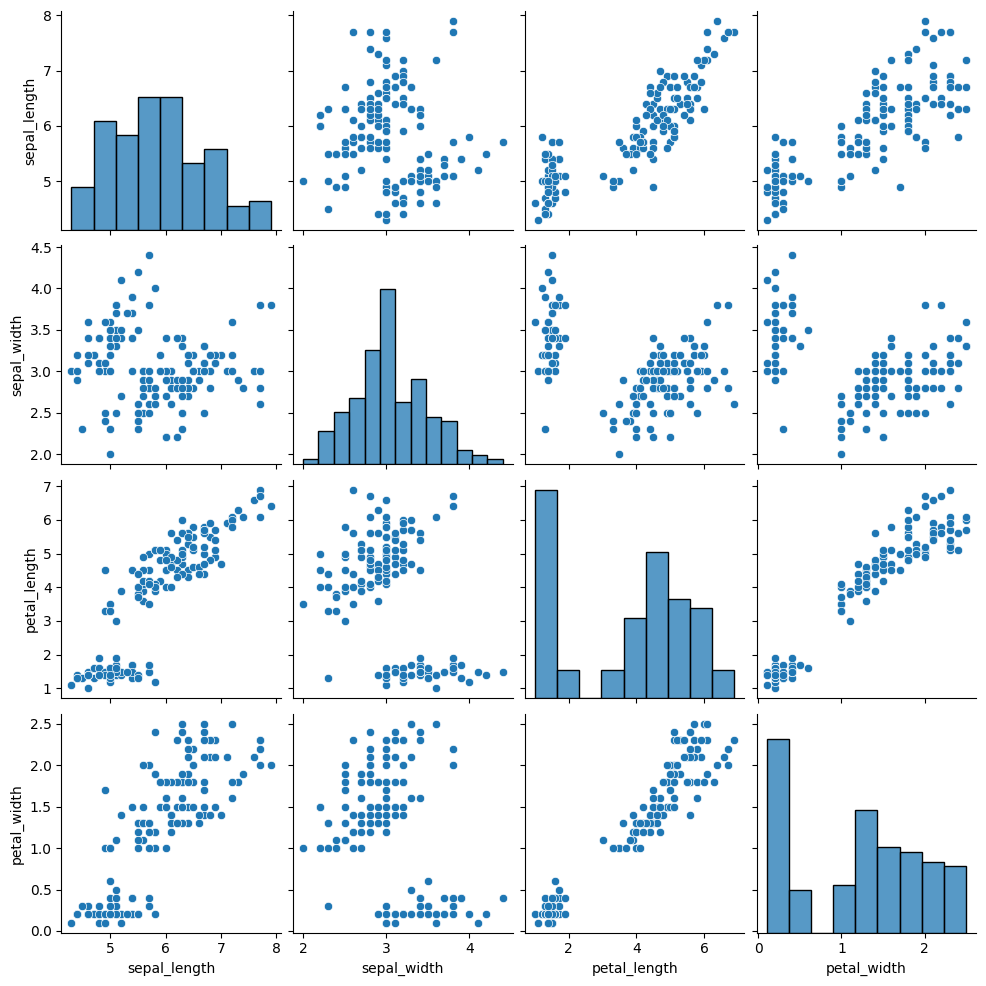

In [11]:
plt.figure(figsize=(13,17))
sns.pairplot(data=iris)
plt.show()

Machine Learning Algorithm

In [12]:
from sklearn.preprocessing import OneHotEncoder
#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
iris_target_e = np.reshape(iris_target,(-1,1))
iris_target_en = encoder.fit_transform(iris_target_e)
print(iris_target_en)
######### Normalization #############
#------------------
transformer = MinMaxScaler()
transformer.fit(iris)
iris_norm = transformer.transform(iris)

print(iris_norm)

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 75% of the entire data set
train_x, test_x, train_y, test_y = train_test_split(iris_norm, iris_target_en, test_size=1 - train_ratio, random_state=42)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
val_x, test_x, val_y, test_y = train_test_split(test_x, test_y, test_size=test_ratio/(test_ratio + validation_ratio), random_state=42)

#print(train_x, val_x, test_x)
print('Train: {}, Val: {}, and Test: {}'.format(len(train_x), len(val_x), len(test_x)))
print('Total: {}'.format(len(train_x) + len(val_x) + len(test_x)))

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

Deep Learning Models

In [13]:
train_x.shape

(104, 4)

In [14]:
# Creation of the MLP model

# 1st model

model_1 = keras.models.Sequential([
    keras.layers.Dense(8, input_dim=train_x.shape[1], activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])


# 2nd model

model_2 = keras.models.Sequential([
    keras.layers.Dense(16, input_dim=train_x.shape[1], activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])


# 3rd model

model_3 = keras.models.Sequential([
    keras.layers.Dense(8, input_dim=train_x.shape[1], activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [15]:
epochs = 25
batchs = 5


# Advantages of SGD with Momentum :
# Momentum is faster than stochastic gradient descent the training will be faster than SGD.
# Local minima can be an escape and reach global minima due to the momentum involved.

model_1.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

model_2.compile(
    optimizer=keras.optimizers.Adagrad(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

model_3.compile(
    optimizer=keras.optimizers.SGD(momentum=0.9),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [16]:
history = model_1.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=epochs, batch_size = batchs)
model_1.summary()

Epoch 1/25
21/21 [==============================] - 3s 18ms/step - loss: 1.1519 - accuracy: 0.2404 - val_loss: 1.1001 - val_accuracy: 0.0870
Epoch 2/25
21/21 [==============================] - 0s 7ms/step - loss: 1.1198 - accuracy: 0.0385 - val_loss: 1.0924 - val_accuracy: 0.0435
Epoch 3/25
21/21 [==============================] - 0s 6ms/step - loss: 1.0990 - accuracy: 0.2596 - val_loss: 1.0868 - val_accuracy: 0.2609
Epoch 4/25
21/21 [==============================] - 0s 7ms/step - loss: 1.0815 - accuracy: 0.3558 - val_loss: 1.0798 - val_accuracy: 0.2609
Epoch 5/25
21/21 [==============================] - 0s 7ms/step - loss: 1.0676 - accuracy: 0.3558 - val_loss: 1.0745 - val_accuracy: 0.2609
Epoch 6/25
21/21 [==============================] - 0s 6ms/step - loss: 1.0546 - accuracy: 0.3558 - val_loss: 1.0688 - val_accuracy: 0.2609
Epoch 7/25
21/21 [==============================] - 0s 6ms/step - loss: 1.0428 - accuracy: 0.3558 - val_loss: 1.0588 - val_accuracy: 0.2609
Epoch 8/25
21/21 [=

Model 1 performance

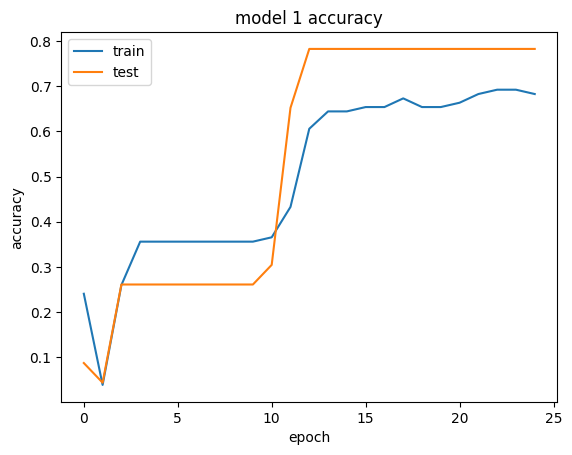

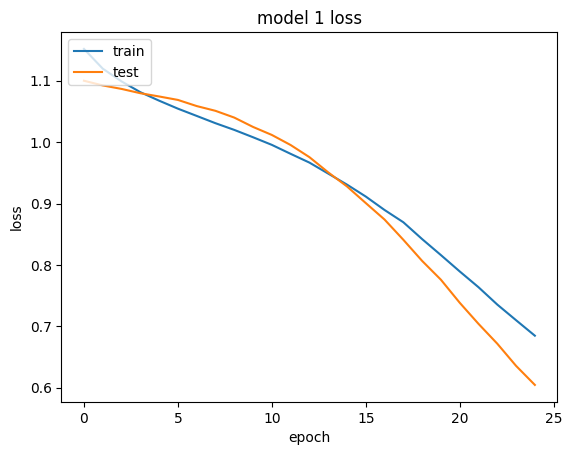

In [17]:
# Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
print('Model_1 train set performance: ')
model_1.evaluate(train_x, train_y)
print('Model_1 test set performance: ')
model_1.evaluate(test_x, test_y)

Model_1 train set performance: 
4/4 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.6923
Model_1 test set performance: 
1/1 [==============================] - 0s 22ms/step - loss: 0.6724 - accuracy: 0.6087


[0.6724351644515991, 0.6086956262588501]

1/1 [==============================] - 0s 171ms/step
Confusion Matrix for Model_3
[[7 0 0]
 [0 0 9]
 [0 0 7]]
[1. 0. 1.]


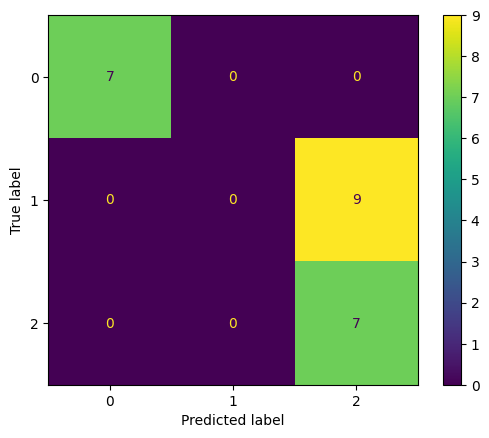

In [32]:
y_pred1 = model_1.predict(test_x)
print('Confusion Matrix for Model_3')
matrix_model1 = confusion_matrix(test_y.argmax(axis=1), y_pred1.argmax(axis=1))
print(matrix_model1)
print(matrix_model1.diagonal() / matrix_model1.sum(axis=1))
cm_1 = ConfusionMatrixDisplay(matrix_model1)
cm_1.plot()

Model 2

In [19]:
history2 = model_2.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=epochs, batch_size = batchs)
model_2.summary()

Epoch 1/25
21/21 [==============================] - 1s 11ms/step - loss: 1.1004 - accuracy: 0.2981 - val_loss: 1.0373 - val_accuracy: 0.5217
Epoch 2/25
21/21 [==============================] - 0s 5ms/step - loss: 1.0951 - accuracy: 0.3077 - val_loss: 1.0336 - val_accuracy: 0.5217
Epoch 3/25
21/21 [==============================] - 0s 4ms/step - loss: 1.0909 - accuracy: 0.3077 - val_loss: 1.0304 - val_accuracy: 0.5217
Epoch 4/25
21/21 [==============================] - 0s 5ms/step - loss: 1.0874 - accuracy: 0.3077 - val_loss: 1.0275 - val_accuracy: 0.5217
Epoch 5/25
21/21 [==============================] - 0s 4ms/step - loss: 1.0843 - accuracy: 0.3077 - val_loss: 1.0248 - val_accuracy: 0.5217
Epoch 6/25
21/21 [==============================] - 0s 4ms/step - loss: 1.0816 - accuracy: 0.3269 - val_loss: 1.0224 - val_accuracy: 0.5652
Epoch 7/25
21/21 [==============================] - 0s 4ms/step - loss: 1.0791 - accuracy: 0.3462 - val_loss: 1.0202 - val_accuracy: 0.5652
Epoch 8/25
21/21 [=

Model 2 performance

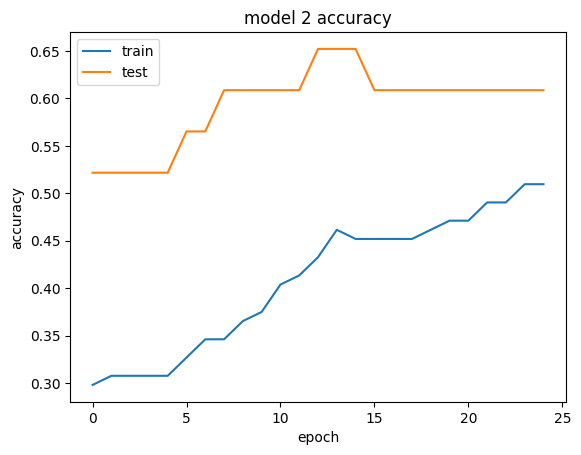

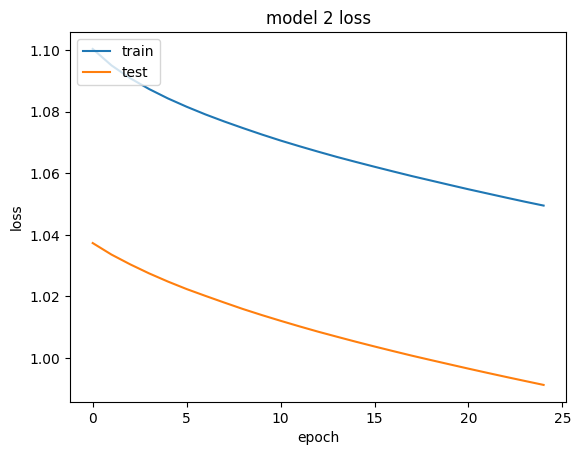

In [20]:
#Model Accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model 2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
print('Model_2 train set performance: ')
model_2.evaluate(train_x, train_y)
print('Model_2 test set performance: ')
model_2.evaluate(test_x, test_y)

Model_2 train set performance: 
4/4 [==============================] - 0s 4ms/step - loss: 1.0488 - accuracy: 0.5192
Model_2 test set performance: 
1/1 [==============================] - 0s 22ms/step - loss: 1.0266 - accuracy: 0.4348


[1.0265655517578125, 0.43478259444236755]

1/1 [==============================] - 0s 253ms/step
Confusion Matrix for Model_2
[[7 0 0]
 [4 2 3]
 [4 2 1]]
[1.         0.22222222 0.14285714]


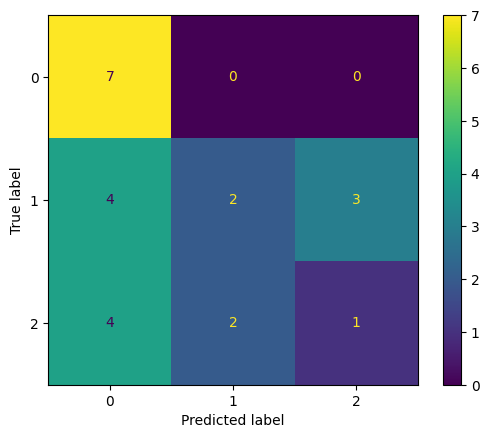

In [31]:
y_pred2 = model_2.predict(test_x)
print('Confusion Matrix for Model_2')
matrix_model2 = confusion_matrix(test_y.argmax(axis=1), y_pred2.argmax(axis=1))
print(matrix_model2)
print(matrix_model2.diagonal() / matrix_model2.sum(axis=1))
cm_2 = ConfusionMatrixDisplay(matrix_model2)
cm_2.plot()

Model 3

In [22]:
history3 = model_3.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=epochs,batch_size = batchs)
model_3.summary()

Epoch 1/25
21/21 [==============================] - 1s 12ms/step - loss: 0.9892 - accuracy: 0.5288 - val_loss: 0.8892 - val_accuracy: 0.8696
Epoch 2/25
21/21 [==============================] - 0s 5ms/step - loss: 0.7739 - accuracy: 0.7500 - val_loss: 0.5914 - val_accuracy: 0.8261
Epoch 3/25
21/21 [==============================] - 0s 5ms/step - loss: 0.5637 - accuracy: 0.7981 - val_loss: 0.3917 - val_accuracy: 0.8261
Epoch 4/25
21/21 [==============================] - 0s 4ms/step - loss: 0.4447 - accuracy: 0.8173 - val_loss: 0.2974 - val_accuracy: 0.9130
Epoch 5/25
21/21 [==============================] - 0s 4ms/step - loss: 0.3855 - accuracy: 0.8846 - val_loss: 0.2497 - val_accuracy: 0.9565
Epoch 6/25
21/21 [==============================] - 0s 5ms/step - loss: 0.3425 - accuracy: 0.8558 - val_loss: 0.2170 - val_accuracy: 0.9130
Epoch 7/25
21/21 [==============================] - 0s 5ms/step - loss: 0.3511 - accuracy: 0.8462 - val_loss: 0.1953 - val_accuracy: 0.9565
Epoch 8/25
21/21 [=

Model 3 performance

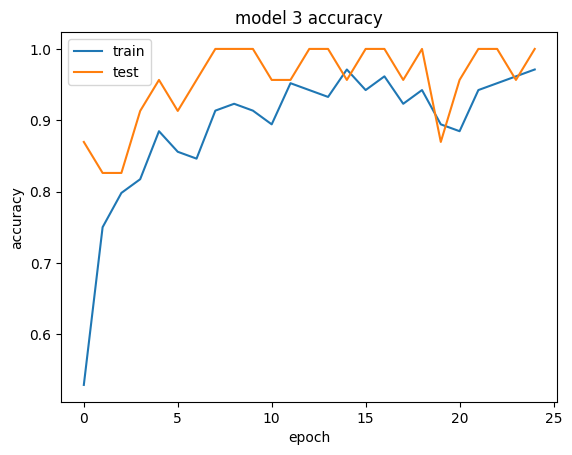

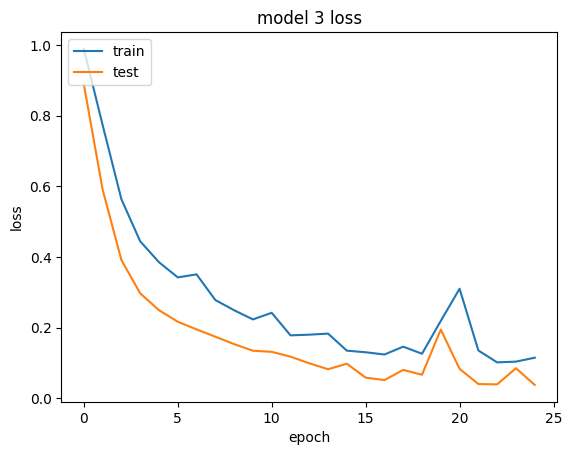

In [23]:
# Model Accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model 3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
print('Model_3 train set performance: ')
model_3.evaluate(train_x, train_y)
print('Model_3 test set performance: ')
model_3.evaluate(test_x, test_y)

Model_3 train set performance: 
4/4 [==============================] - 0s 8ms/step - loss: 0.1362 - accuracy: 0.9615
Model_3 test set performance: 
1/1 [==============================] - 0s 23ms/step - loss: 0.1566 - accuracy: 0.9565


[0.15660296380519867, 0.95652174949646]

1/1 [==============================] - 0s 26ms/step
Confusion Matrix for Model_3
[[7 0 0]
 [0 8 1]
 [0 0 7]]
[1.         0.88888889 1.        ]


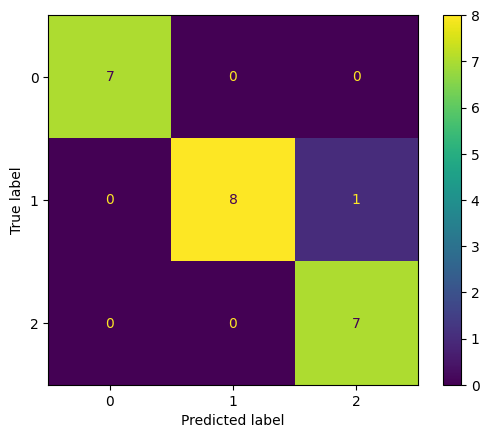

In [30]:
y_pred3 = model_3.predict(test_x)
#y_pred3 = np.round(y_pred3)
print('Confusion Matrix for Model_3')
matrix_model3 = confusion_matrix(test_y.argmax(axis=1), y_pred3.argmax(axis=1))
print(matrix_model3)
print(matrix_model3.diagonal() / matrix_model3.sum(axis=1))
cm_3 = ConfusionMatrixDisplay(matrix_model3)
cm_3.plot()